## Waste Management Using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# Display progress bar for data loading
# tqdm ensures a visual representation of loading progress
from tqdm import tqdm
import os
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message=".*numpy.*")


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# Define paths for the training and testing datasets
train_path = os.path.join("dataset/TRAIN")
test_path = os.path.join("dataset/TEST")

In [4]:
# Import TensorFlow and Keras libraries for building the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
from cv2 import cvtColor
# Initialize empty lists to store image data and corresponding labels
x_data = []
y_data = []
# Iterate through each category folder in the training dataset
for category in glob(train_path+'/*'):
        # Iterate through each image file in the category folder
    for file in tqdm(glob(category+'/*')):
                # Read the image file
        img_array = cv2.imread(file)
        
        # Convert the image from BGR format (OpenCV default) to RGB
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
                # Create a DataFrame to store image data and labels
        data = pd.DataFrame({'image' :x_data, 'label' :y_data})

100%|██████████| 9999/9999 [02:19<00:00, 71.67it/s] 


In [6]:
# Check the shape of the DataFrame to verify the number of images and labels
# data.shape should return (22564, 2) indicating 22,564 rows and 2 columns
data.shape

(22564, 2)

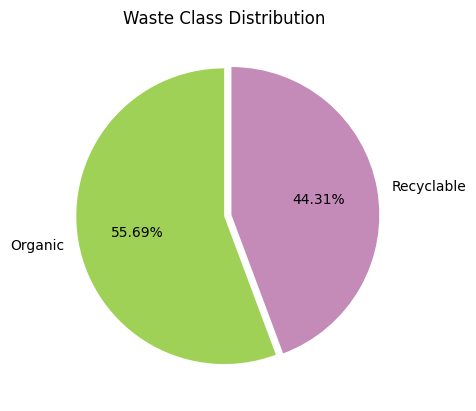

In [7]:
# Visualizing the distribution of waste classes
colors = [ '#a0d157', '#c48bb8' ]
# Visualize the distribution of classes (Organic and Recyclable) in the dataset
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors = colors, startangle=90, explode = [0, 0.05])
# Display the chart title
plt.title('Waste Class Distribution')
# Display the pie chart
plt.show()
